# Project Background from Kaggle #
Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimens

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history!

*Note: Our dataset contains only the 8,693 rows from the training dataset that is part of the Kaggle challenge and is therefore a subset of the original 12,970 passengers aboard Spaceship Titanic.*

Source: https://www.kaggle.com/competitions/spaceship-titanic

### Examine Data ###

In [1]:
#Load libaries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score
from sklearn.metrics import mean_squared_error

#Load dataset file
df = pd.read_csv('data.csv')
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [3]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>],
       [<Axes: title={'center': 'FoodCourt'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>]], dtype=object)

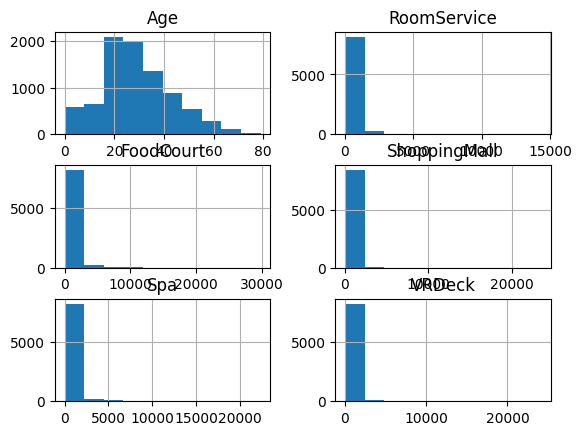

In [5]:
df.hist()

In [6]:
df['HomePlanet'].value_counts(dropna=False)

HomePlanet
Earth     4602
Europa    2131
Mars      1759
NaN        201
Name: count, dtype: int64

In [7]:
df['CryoSleep'].value_counts(dropna=False)

CryoSleep
False    5439
True     3037
NaN       217
Name: count, dtype: int64

In [8]:
df['Destination'].value_counts(dropna=False)

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
NaN               182
Name: count, dtype: int64

In [9]:
df['VIP'].value_counts(dropna=False)

VIP
False    8291
NaN       203
True      199
Name: count, dtype: int64

In [10]:
df['Transported'].value_counts(dropna=False)

Transported
True     4378
False    4315
Name: count, dtype: int64

### Address missing data ###

In [11]:
# Fill missing CryoSleep values if the passenger spent money on amenities
df['Amenities_sum'] = df[['RoomService', 'FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)
df['CryoSleep'].fillna(df['Amenities_sum'] == 0, inplace=True)
df['CryoSleep'].value_counts(dropna=False)

CryoSleep
False    5558
True     3135
Name: count, dtype: int64

In [12]:
# Filling missing ages with median age so as not to skew the age distribution
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Age'].count()

8693

In [13]:
# Fill in missing amounts in amenities. If they were in CryoSleep, then spending set to 0, otherwise, use median amount.
for col in ['RoomService', 'FoodCourt','ShoppingMall','Spa','VRDeck']:
    if df['CryoSleep'].any():
        df[col].fillna(0, inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    8693 non-null   object 
 1   HomePlanet     8492 non-null   object 
 2   CryoSleep      8693 non-null   bool   
 3   Cabin          8494 non-null   object 
 4   Destination    8511 non-null   object 
 5   Age            8693 non-null   float64
 6   VIP            8490 non-null   object 
 7   RoomService    8693 non-null   float64
 8   FoodCourt      8693 non-null   float64
 9   ShoppingMall   8693 non-null   float64
 10  Spa            8693 non-null   float64
 11  VRDeck         8693 non-null   float64
 12  Name           8493 non-null   object 
 13  Transported    8693 non-null   bool   
 14  Amenities_sum  8693 non-null   float64
dtypes: bool(2), float64(7), object(6)
memory usage: 900.0+ KB


### Pre-processing ###

In [14]:
#Break out cabin number into usable features
df[["Deck", "Cabin_num", "Side"]] = df["Cabin"].str.split("/", expand=True)

In [15]:
df['Deck'].value_counts(dropna=False)

Deck
F      2794
G      2559
E       876
B       779
C       747
D       478
A       256
NaN     199
T         5
Name: count, dtype: int64

In [16]:
df['Cabin_num'].value_counts(dropna=False)

Cabin_num
NaN     199
82       28
86       22
19       22
56       21
       ... 
1644      1
1515      1
1639      1
1277      1
1894      1
Name: count, Length: 1818, dtype: int64

In [17]:
df['Side'].value_counts(dropna=False)

Side
S      4288
P      4206
NaN     199
Name: count, dtype: int64

In [18]:
# Drop the columns with missing values for deck and side (Cabin_num will be dropped altogether later on)
df.dropna(subset=['Deck','Side'], inplace=True)
#df.info()

#### Amenities Grouping ####

<Axes: xlabel='Spa_spend'>

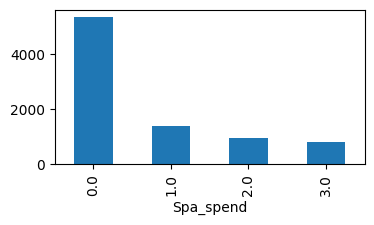

In [19]:
df['Spa_spend'] = np.nan
df.loc[df['Spa'] == 0, 'Spa_spend'] = 0 #None
df.loc[(df['Spa'] > 0) & (df['Spa'] <= 150), 'Spa_spend'] = 1 #Low
df.loc[(df['Spa'] > 150) & (df['Spa'] <= 750), 'Spa_spend'] = 2 #Medium
df.loc[df['Spa'] > 750, 'Spa_spend'] = 3 #High
df['Spa_spend'].value_counts().plot(kind='bar', figsize=(4,2))

<Axes: xlabel='VRDeck_spend'>

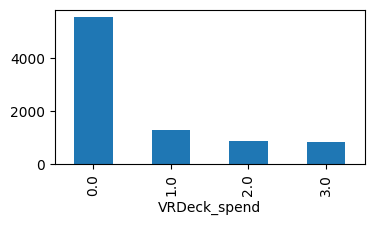

In [20]:
df['VRDeck_spend'] = np.nan
df.loc[df['VRDeck'] == 0, 'VRDeck_spend'] = 0 #None
df.loc[(df['VRDeck'] > 0) & (df['VRDeck'] <= 150), 'VRDeck_spend'] = 1 #Low
df.loc[(df['VRDeck'] > 150) & (df['VRDeck'] <= 750), 'VRDeck_spend'] = 2 #Medium
df.loc[df['VRDeck'] > 750, 'VRDeck_spend'] = 3 #High
df['VRDeck_spend'].value_counts().plot(kind='bar', figsize=(4,2))

<Axes: xlabel='RoomService_spend'>

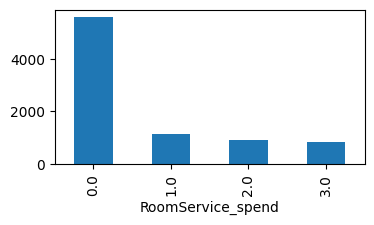

In [21]:
df['RoomService_spend'] = np.nan
df.loc[df['RoomService'] == 0, 'RoomService_spend'] = 0 #None
df.loc[(df['RoomService'] > 0) & (df['RoomService'] <= 150), 'RoomService_spend'] = 1 #Low
df.loc[(df['RoomService'] > 150) & (df['RoomService'] <= 750), 'RoomService_spend'] = 2 #Medium
df.loc[df['RoomService'] > 750, 'RoomService_spend'] = 3 #High
df['RoomService_spend'].value_counts().plot(kind='bar', figsize=(4,2))

<Axes: xlabel='ShoppingMall_spend'>

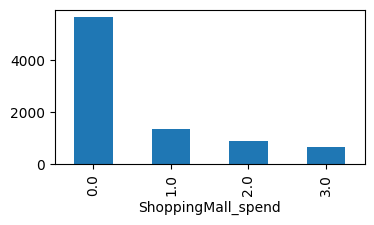

In [22]:
df['ShoppingMall_spend'] = np.nan
df.loc[df['ShoppingMall'] == 0, 'ShoppingMall_spend'] = 0 #None
df.loc[(df['ShoppingMall'] > 0) & (df['ShoppingMall'] <= 150), 'ShoppingMall_spend'] = 1 #Low
df.loc[(df['ShoppingMall'] > 150) & (df['ShoppingMall'] <= 750), 'ShoppingMall_spend'] = 2 #Medium
df.loc[df['ShoppingMall'] > 750, 'ShoppingMall_spend'] = 3 #High
df['ShoppingMall_spend'].value_counts().plot(kind='bar', figsize=(4,2))

<Axes: xlabel='FoodCourt_spend'>

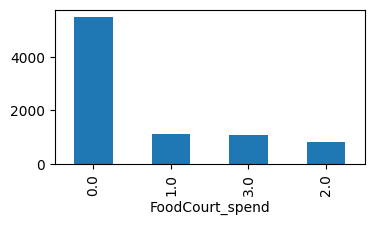

In [23]:
df['FoodCourt_spend'] = np.nan
df.loc[df['FoodCourt'] == 0, 'FoodCourt_spend'] = 0 #None
df.loc[(df['FoodCourt'] > 0) & (df['FoodCourt'] <= 150), 'FoodCourt_spend'] = 1 #Low
df.loc[(df['FoodCourt'] > 150) & (df['FoodCourt'] <= 750), 'FoodCourt_spend'] = 2 #Medium
df.loc[df['FoodCourt'] > 750, 'FoodCourt_spend'] = 3 #High
df['FoodCourt_spend'].value_counts().plot(kind='bar', figsize=(4,2))

#### Age grouping ####
Reasonable age groups: 1 = <13, 2 = 13-18, 3 = 19-30, 4 = 31-45, 5 = 46-65, 6 = >65

<Axes: xlabel='Age_group'>

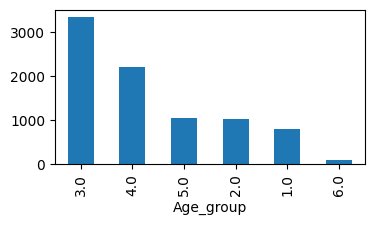

In [24]:
df['Age_group'] = np.nan
df.loc[df['Age'] < 13,'Age_group'] = 1 
df.loc[(df['Age'] >= 13) & (df['Age'] < 19),'Age_group'] = 2 
df.loc[(df['Age'] >= 19) & (df['Age'] < 31),'Age_group'] = 3
df.loc[(df['Age'] >= 31) & (df['Age'] < 46),'Age_group'] = 4
df.loc[(df['Age'] >= 46) & (df['Age'] < 66),'Age_group'] = 5
df.loc[df['Age'] >= 66,'Age_group'] = 6
df['Age_group'].value_counts().plot(kind='bar', figsize=(4,2))

#### Categorical Columns ####

In [25]:
cat_cols = ['HomePlanet', 'Destination', 'VIP', 'Deck', 'Side']
df = pd.get_dummies(df, columns=cat_cols)
#df

In [26]:
#df.info()

#### Create Grouped Feature ####

In [27]:
df[["Group_id", "Group_num"]] = df["PassengerId"].str.split("_", expand=True)
#df.info()

In [28]:
df['Group_num'] = pd.to_numeric(df['Group_num'])
df['Grouped'] = df.groupby('Group_id')['Group_num'].transform('count')>1
df['GroupSize'] = df.groupby('Group_id')['Group_num'].transform('count')
#df.info()

#### Drop Unnecessary Columns ####

In [29]:
df.drop(['PassengerId','Age','Cabin','Name','Cabin_num','Amenities_sum','Group_id','Group_num','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'], axis=1, inplace=True)
#df.info()

In [30]:
df

,CryoSleep,Transported,Spa_spend,VRDeck_spend,RoomService_spend,ShoppingMall_spend,FoodCourt_spend,Age_group,HomePlanet_Earth,HomePlanet_Europa,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S,Grouped,GroupSize
0,False,False,0.0,0.0,0.0,0.0,0.0,4.0,False,True,...,False,False,False,False,False,False,True,False,False,1
1,False,True,2.0,1.0,1.0,1.0,1.0,3.0,True,False,...,False,False,False,True,False,False,False,True,False,1
2,False,False,3.0,1.0,1.0,0.0,3.0,5.0,False,True,...,False,False,False,False,False,False,False,True,True,2
3,False,False,3.0,2.0,0.0,2.0,3.0,4.0,False,True,...,False,False,False,False,False,False,False,True,True,2
4,False,True,2.0,1.0,2.0,2.0,1.0,2.0,True,False,...,False,False,False,True,False,False,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,False,3.0,1.0,0.0,0.0,3.0,4.0,False,True,...,False,False,False,False,False,False,True,False,False,1
8689,True,False,0.0,0.0,0.0,0.0,0.0,2.0,True,False,...,False,False,False,False,True,False,False,True,False,1
8690,False,True,1.0,0.0,0.0,3.0,0.0,3.0,True,False,...,False,False,False,False,True,False,False,True,False,1
8691,False,False,2.0,3.0,0.0,0.0,3.0,4.0,False,True,...,False,False,True,False,False,False,False,True,True,2


#### Data Visuals ####

CryoSleep


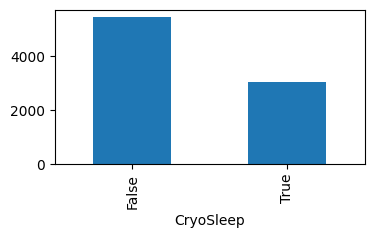

Transported


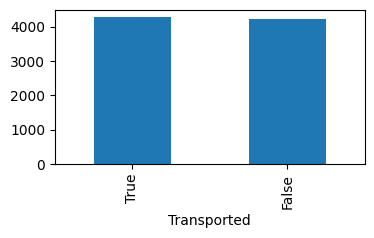

Spa_spend


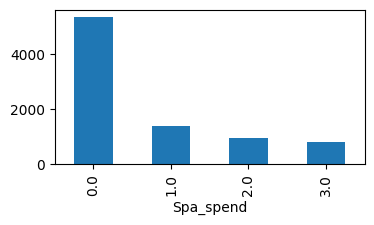

VRDeck_spend


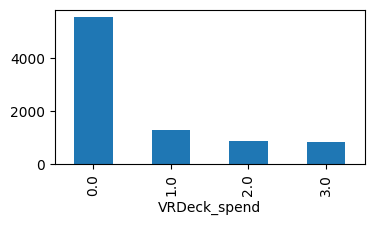

RoomService_spend


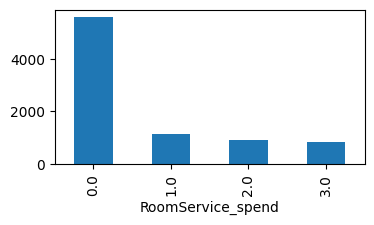

ShoppingMall_spend


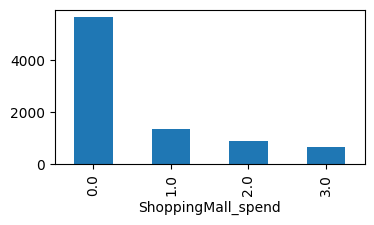

FoodCourt_spend


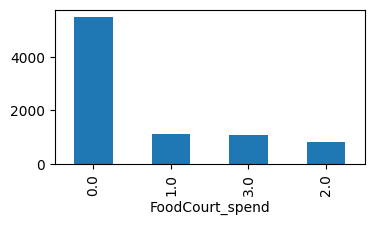

Age_group


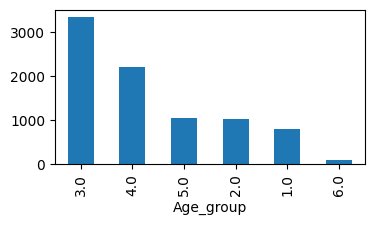

HomePlanet_Earth


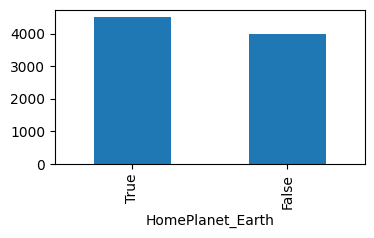

HomePlanet_Europa


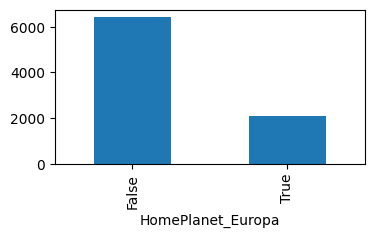

HomePlanet_Mars


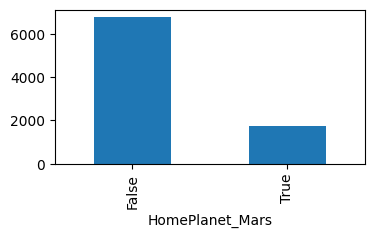

Destination_55 Cancri e


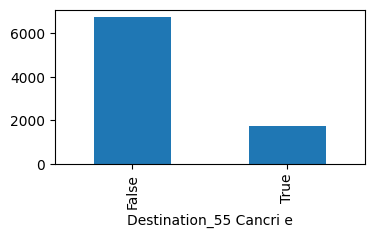

Destination_PSO J318.5-22


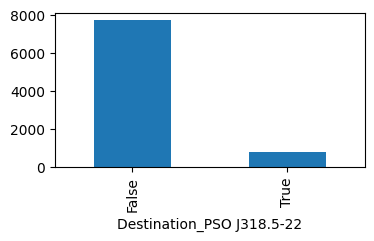

Destination_TRAPPIST-1e


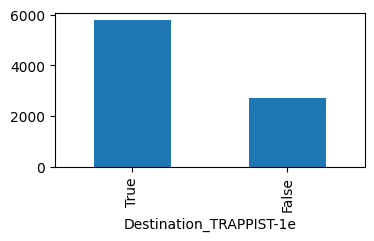

VIP_False


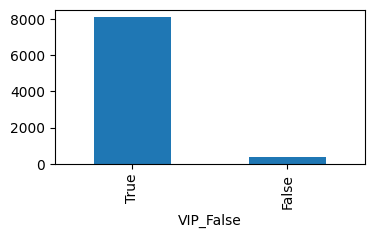

VIP_True


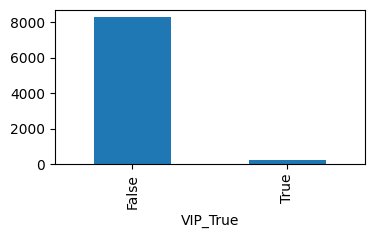

Deck_A


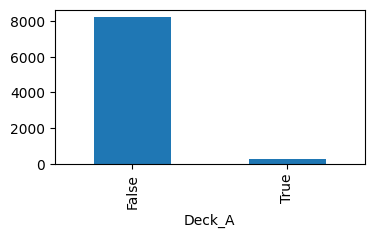

Deck_B


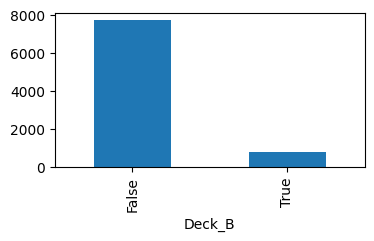

Deck_C


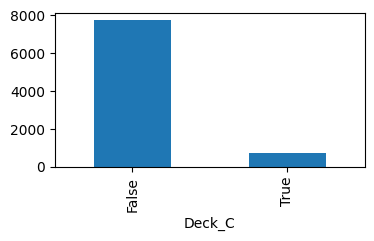

Deck_D


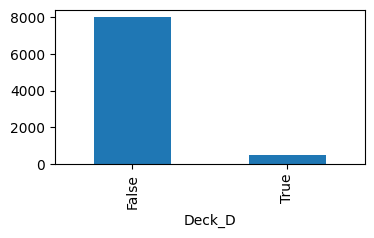

Deck_E


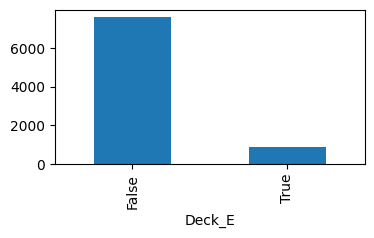

Deck_F


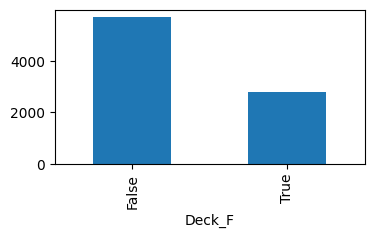

Deck_G


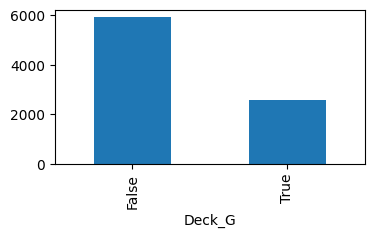

Deck_T


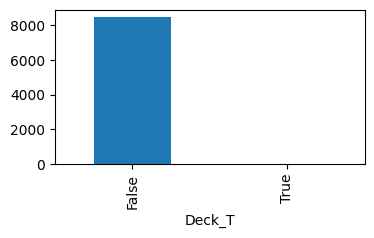

Side_P


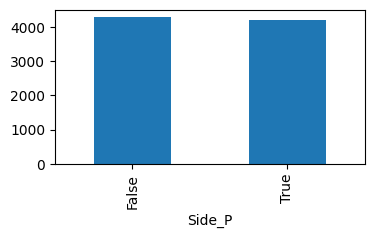

Side_S


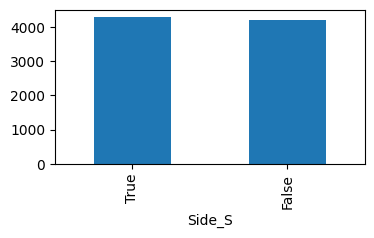

Grouped


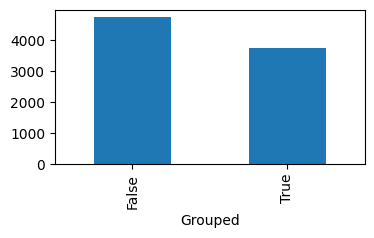

GroupSize


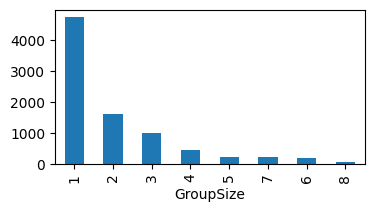

In [31]:
for col in df:
    print(col)
    df[col].value_counts().plot(kind='bar', figsize=(4,2))
    plt.show()

### Train & Test Data ###

In [32]:
X = df.drop('Transported', axis=1)
y = df['Transported']

trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2)

# Create separate features for each age group bin
for age_bin in [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]:
    trainX[f'Age_group_{age_bin}'] = (trainX['Age_group'] == age_bin).astype(int)
    testX[f'Age_group_{age_bin}'] = (testX['Age_group'] == age_bin).astype(int)

# Create separate features for each group size
for grp_size in [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]:
    trainX[f'Grp_size_{grp_size}'] = (trainX['GroupSize'] == grp_size).astype(int)
    testX[f'Grp_size_{grp_size}'] = (testX['GroupSize'] == grp_size).astype(int)

trainX.shape, testX.shape, trainY.shape, testY.shape

((6795, 41), (1699, 41), (6795,), (1699,))

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8494 entries, 0 to 8692
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8494 non-null   bool   
 1   Spa_spend                  8494 non-null   float64
 2   VRDeck_spend               8494 non-null   float64
 3   RoomService_spend          8494 non-null   float64
 4   ShoppingMall_spend         8494 non-null   float64
 5   FoodCourt_spend            8494 non-null   float64
 6   Age_group                  8494 non-null   float64
 7   HomePlanet_Earth           8494 non-null   bool   
 8   HomePlanet_Europa          8494 non-null   bool   
 9   HomePlanet_Mars            8494 non-null   bool   
 10  Destination_55 Cancri e    8494 non-null   bool   
 11  Destination_PSO J318.5-22  8494 non-null   bool   
 12  Destination_TRAPPIST-1e    8494 non-null   bool   
 13  VIP_False                  8494 non-null   bool   
 1

In [34]:
#y.info()

In [35]:
# Standardize numeric features using StandardScaler
scaler = StandardScaler()
trainX[['Spa_spend', 'VRDeck_spend', 'RoomService_spend', 'ShoppingMall_spend', 'FoodCourt_spend', 'GroupSize']] = scaler.fit_transform(trainX[['Spa_spend', 'VRDeck_spend', 'RoomService_spend', 'ShoppingMall_spend', 'FoodCourt_spend', 'GroupSize']])
testX[['Spa_spend', 'VRDeck_spend', 'RoomService_spend', 'ShoppingMall_spend', 'FoodCourt_spend', 'GroupSize']] = scaler.transform(testX[['Spa_spend', 'VRDeck_spend', 'RoomService_spend', 'ShoppingMall_spend', 'FoodCourt_spend', 'GroupSize']])

# Initialize models
logreg_model = LogisticRegression()
rf_model = RandomForestClassifier()

# Train the models
logreg_model.fit(trainX, trainY)
rf_model.fit(trainX, trainY)

# Make predictions
logreg_pred = logreg_model.predict(testX)
rf_pred = rf_model.predict(testX)

# Evaluate model performance
print("Logistic Regression Accuracy:", accuracy_score(testY, logreg_pred))
print("Random Forest Accuracy:", accuracy_score(testY, rf_pred))


# Additional evaluation metrics
print("\nLogistic Regression Classification Report:\n", classification_report(testY, logreg_pred))
print("\nRandom Forest Classification Report:\n", classification_report(testY, rf_pred))



C:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7863449087698646
Random Forest Accuracy: 0.7781047675103002

Logistic Regression Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.79      0.79       849
        True       0.79      0.79      0.79       850

    accuracy                           0.79      1699
   macro avg       0.79      0.79      0.79      1699
weighted avg       0.79      0.79      0.79      1699


Random Forest Classification Report:
               precision    recall  f1-score   support

       False       0.76      0.82      0.79       849
        True       0.80      0.74      0.77       850

    accuracy                           0.78      1699
   macro avg       0.78      0.78      0.78      1699
weighted avg       0.78      0.78      0.78      1699



In [36]:
# Get the coefficients and corresponding feature names
coefficients = logreg_model.coef_[0]
feature_names = trainX.columns
# Not sure if this is correct for how to calculate probability, but it seems to work.
coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients, "Probabliity": np.exp(coefficients)})

coef_df


,Feature,Coefficient,Probabliity
0,CryoSleep,1.185623,3.272726
1,Spa_spend,-0.721736,0.485908
2,VRDeck_spend,-0.701459,0.495861
3,RoomService_spend,-0.570886,0.565025
4,ShoppingMall_spend,0.210591,1.234408
5,FoodCourt_spend,0.379045,1.460889
6,Age_group,-0.057621,0.944008
7,HomePlanet_Earth,-0.366203,0.693362
8,HomePlanet_Europa,0.845401,2.328911
9,HomePlanet_Mars,-0.062897,0.939040


In [37]:
# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})

importance_df

,Feature,Importance
0,CryoSleep,0.098518
1,Spa_spend,0.103749
2,VRDeck_spend,0.106233
3,RoomService_spend,0.101769
4,ShoppingMall_spend,0.076789
5,FoodCourt_spend,0.079577
6,Age_group,0.034932
7,HomePlanet_Earth,0.027903
8,HomePlanet_Europa,0.020935
9,HomePlanet_Mars,0.014127


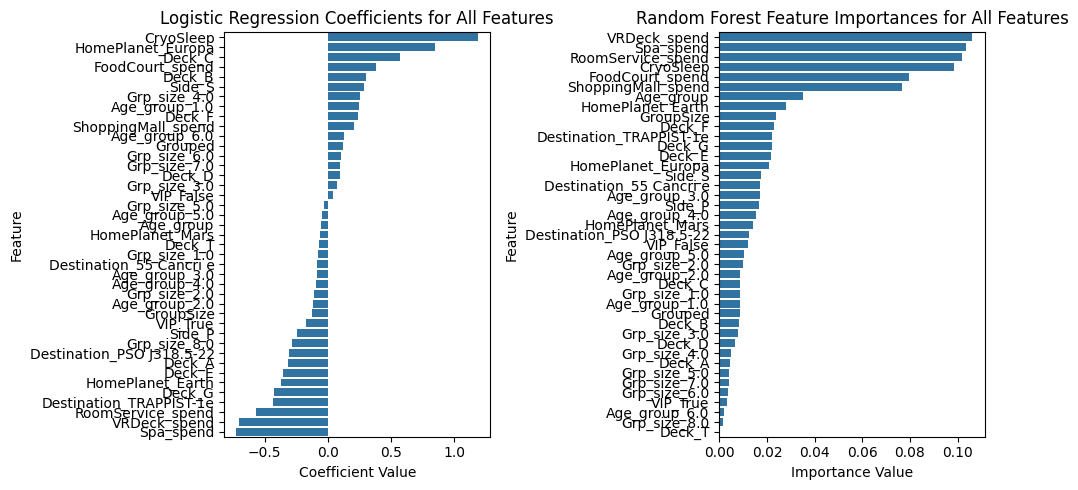

In [38]:
# Plot coefficients for all features (Logistic Regression)
plt.figure(figsize=(15, 5))

# Logistic Regression
plt.subplot(1, 3, 1)
sns.barplot(x="Coefficient", y="Feature", data=coef_df.sort_values(by="Coefficient", ascending=False))
plt.title("Logistic Regression Coefficients for All Features")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")

# Random Forest
plt.subplot(1, 3, 2)
sns.barplot(x="Importance", y="Feature", data=importance_df.sort_values(by="Importance", ascending=False))
plt.title("Random Forest Feature Importances for All Features")
plt.xlabel("Importance Value")
plt.ylabel("Feature")

plt.tight_layout()
plt.show()


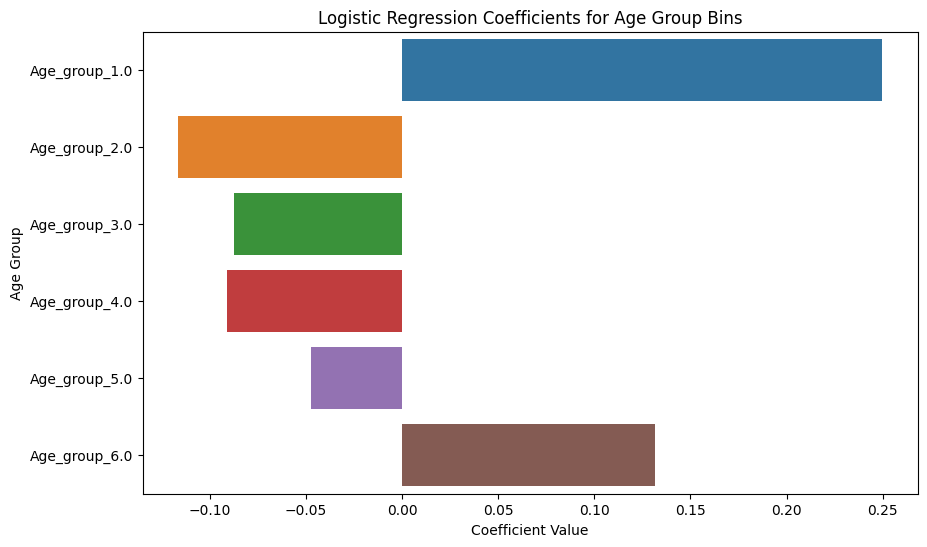

In [39]:
# Extract coefficients for all age features
coef = pd.DataFrame({'Feature': trainX.columns, 'Coefficient': logreg_model.coef_[0]})

# Filter coefficients for Age_group bins
age_group_bins_coef = coef[coef["Feature"].str.startswith("Age_group")]

# Plot coefficients for each age group bin
plt.figure(figsize=(10, 6))
for age_bin in [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]:
    sns.barplot(x="Coefficient", y="Feature", data=age_group_bins_coef[age_group_bins_coef['Feature'] == f'Age_group_{age_bin}'],legend=False)

plt.title("Logistic Regression Coefficients for Age Group Bins")
plt.xlabel("Coefficient Value")
plt.ylabel("Age Group") 
plt.show()

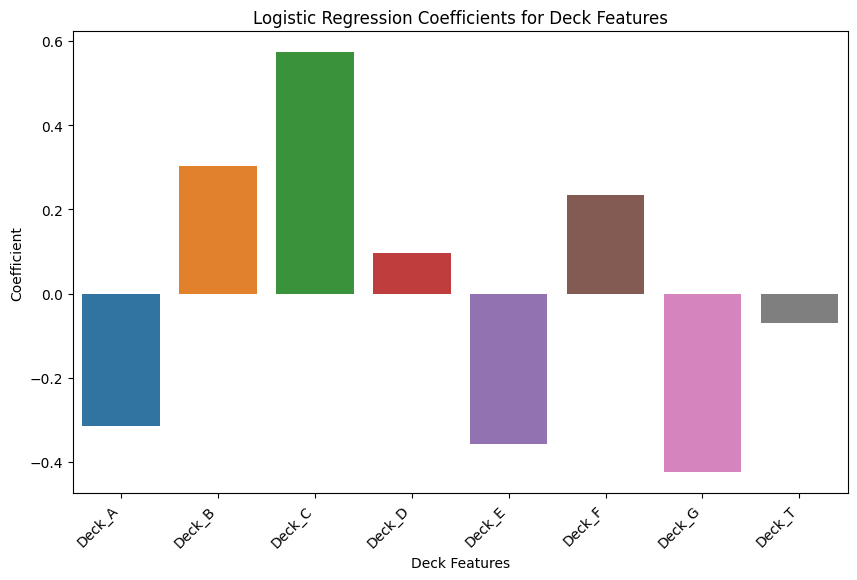

In [44]:
# Extract coefficients related to 'Deck'
deck_coef = coef[coef["Feature"].str.startswith("Deck_")]

deck_colors = sns.color_palette(n_colors=len(deck_coef))

plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Coefficient', hue='Feature', data=deck_coef, palette=deck_colors, legend=False)
plt.xlabel('Deck Features')
plt.ylabel('Coefficient')
plt.title('Logistic Regression Coefficients for Deck Features')
plt.xticks(rotation=45, ha='right')
plt.show()

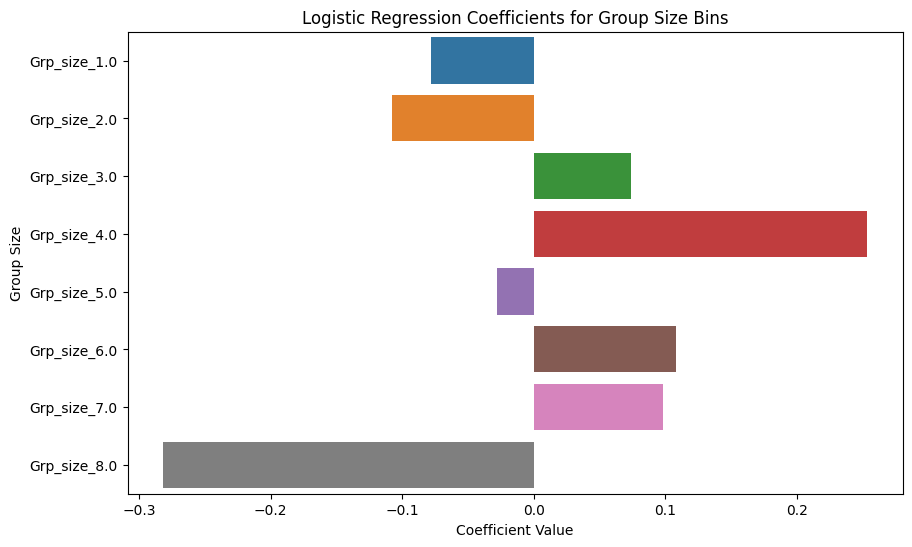

In [41]:
# Extract coefficients for all features
coef = pd.DataFrame({'Feature': trainX.columns, 'Coefficient': logreg_model.coef_[0]})

# Filter coefficients for Group size bins
grp_size_bins_coef = coef[coef["Feature"].str.startswith("Grp_size")]

# Plot coefficients for each group size bin
plt.figure(figsize=(10, 6))
for grp_size in [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]:
    sns.barplot(x="Coefficient", y="Feature", data=grp_size_bins_coef[grp_size_bins_coef['Feature'] == f'Grp_size_{grp_size}'],legend=False)

plt.title("Logistic Regression Coefficients for Group Size Bins")
plt.xlabel("Coefficient Value")
plt.ylabel("Group Size") 
plt.show()

In [42]:
linreg_model = LinearRegression()
linreg_model.fit(trainX, trainY)
linreg_pred = linreg_model.predict(testX)
linreg_mse = mean_squared_error(testY, linreg_pred)
print('Mean Squared Error: ', linreg_mse)

Mean Squared Error:  0.15794727808016523


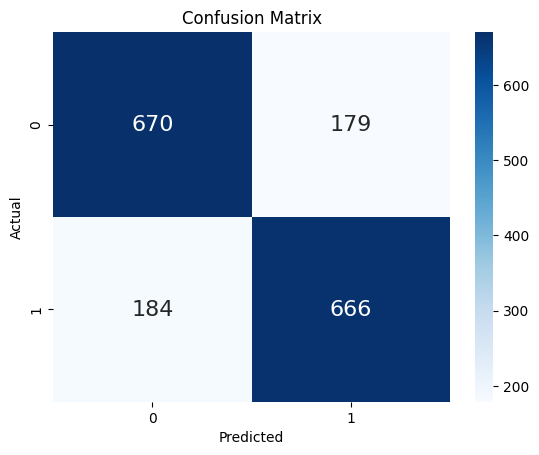

Accuracy:  0.7863449087698646
Precision:  0.7881656804733728
Recall:  0.7835294117647059
F1 Score:  0.7858407079646019


In [43]:
# Convert predicted probabilities to binary predictions (0 or 1)
predictions_binary = (linreg_pred > 0.5).astype(int)

# Create a confusion matrix
conf_matrix = confusion_matrix(testY, predictions_binary)

# Display the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate classification metrics
accuracy = accuracy_score(testY, predictions_binary)
precision = precision_score(testY, predictions_binary)
recall = recall_score(testY, predictions_binary)
f1 = f1_score(testY, predictions_binary)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)